In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [74]:
df=pd.read_csv(r"C:\Users\UMAIMASADAF\Desktop\cleaned_df.csv")

In [75]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    float64
 13  thal        303 non-null    float64
 14  target      303 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 35.6 KB


In [77]:
df.isna().any().any()

False

In [78]:
df.shape

(303, 15)

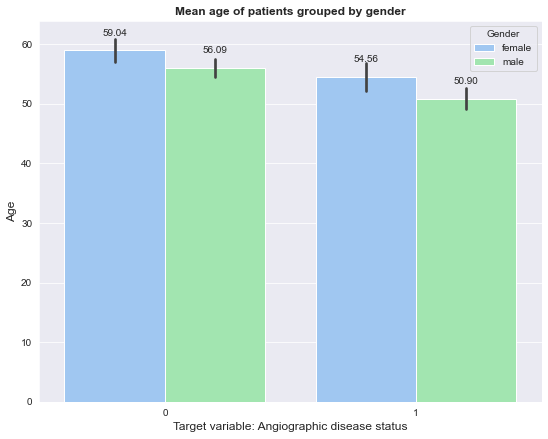

In [79]:

plt.figure(figsize=(9,7))
plt.style.use('seaborn-pastel')
labels=['female','male']
sns.set_style("darkgrid")
ax=sns.barplot(x='target',y='age',data=df,hue='sex')
h, l = ax.get_legend_handles_labels()
ax.legend(h,labels,title="Gender",loc='upper right')
ax.set_ylabel("Age",fontdict={'fontsize' : 12})
ax.set_xlabel("Target variable: Angiographic disease status",fontdict={'fontsize' : 12})
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}'.format(height), (x+ 0.15, y + height + 2.4))
plt.title('Mean age of patients grouped by gender',fontweight="bold")
plt.show()

In [80]:
x= df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [83]:
print(x_train[0])

[ 0.94 -2.15  0.7  -0.92 -0.34  0.8  -0.42 -1.02  0.31  1.4  -0.93  1.02
 -0.75  1.13]


In [84]:
print(x_test[0])

[-0.09 -1.15  0.7   0.97 -0.68 -0.36 -0.42  0.86  0.9  -0.72 -0.93  1.02
 -0.75 -0.58]


In [85]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [86]:
y_pred = classifier.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]]


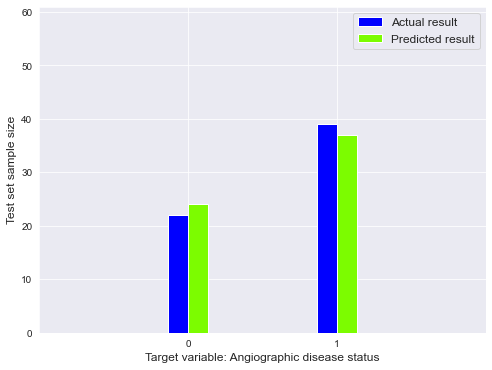

In [88]:

bins = np.linspace(-1,2,10)
plt.figure(figsize=(8,6))
ax =plt.hist([y_test,y_pred],bins=bins,color=['blue','lawngreen'],label=['Actual result','Predicted result'],align='left')
plt.xlabel('Target variable: Angiographic disease status',fontdict={'fontsize' : 12})
plt.ylabel('Test set sample size',fontdict={'fontsize' : 12})
plt.xlim(-1,2)
plt.xticks([0,1])
plt.ylim(0,len(y_test))
plt.legend(prop={'size': 12})
plt.show()

In [89]:
y_pred = classifier.predict(x_test)

In [90]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  3]
 [ 5 34]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.83        22
           1       0.92      0.87      0.89        39

    accuracy                           0.87        61
   macro avg       0.86      0.87      0.86        61
weighted avg       0.87      0.87      0.87        61

